# Playpen

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
import statsmodels.api as statm
import numpy as np 

%matplotlib inline

In [2]:
dat = pd.read_pickle('indian2000.df')

## Testing Out New Things

### Casinos improve per-capita incomes on American Indian reservations.

In [3]:
res = sm.ols(formula='pcinc_log ~ casino', data=dat.loc[dat['year'] == 2000]).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              pcinc_log   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     4.024
Date:                Wed, 01 Feb 2017   Prob (F-statistic):             0.0463
Time:                        14:42:25   Log-Likelihood:                -79.960
No. Observations:                 182   AIC:                             163.9
Df Residuals:                     180   BIC:                             170.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      9.0928      0.049    186.556      0.0

### Including all variables, casinos still improve per-capita incomes on reservations.

In [4]:
res = sm.ols(formula='pcinc_log ~ FC + HC + pcinc_co_log + unempl_co_log + logdist + logruggedness + logresarea_sqkm + ea_v5 + ea_v30 + ea_v32 + ea_v66 + logpop + popadultshare + casino', data=dat.loc[dat['year'] == 2000]).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              pcinc_log   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                     10.04
Date:                Wed, 01 Feb 2017   Prob (F-statistic):           4.23e-16
Time:                        14:42:35   Log-Likelihood:                -26.387
No. Observations:                 182   AIC:                             82.77
Df Residuals:                     167   BIC:                             130.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept           4.0715      2.070     

In [5]:
res = sm.ols(formula='casino ~ pcinc_log', data=dat.loc[dat['year'] == 2000]).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 casino   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     4.024
Date:                Wed, 01 Feb 2017   Prob (F-statistic):             0.0463
Time:                        14:42:38   Log-Likelihood:                -118.86
No. Observations:                 182   AIC:                             241.7
Df Residuals:                     180   BIC:                             248.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -1.0094      0.838     -1.204      0.2

### Reservation PCINC_LOG split by Casino binary value.

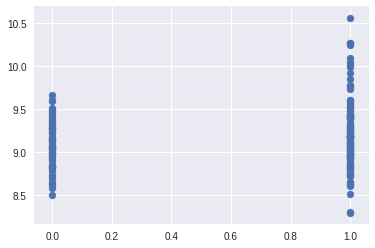

Average Per-Capita Income for Non-Casino Tribes: 9.093
Average Per-Capita Income for Casino Tribes: 9.212


In [8]:
plt.scatter(dat['casino'],dat['pcinc_log'])
plt.show()

nct = (dat.loc[dat['casino'] == 0]).mean()
print('Average Per-Capita Income for Non-Casino Tribes: {0}'.format("%.3f" % nct.pcinc_log))


ct = (dat.loc[dat['casino'] == 1]).mean()
print('Average Per-Capita Income for Casino Tribes: {0}'.format("%.3f" % ct.pcinc_log))

In [36]:
# Calculate the mean PCINC of reservations with casino == 0
print('Casino == 0 --> {0}\nCasino == 1 --> {1}'.format(dat[dat.casino == 0].pcinc_log.mean(),
                                                        dat[dat.casino == 1].pcinc_log.mean()))

Casino == 0 --> 9.092801616579989
Casino == 1 --> 9.21222639792166


(-1, 2)

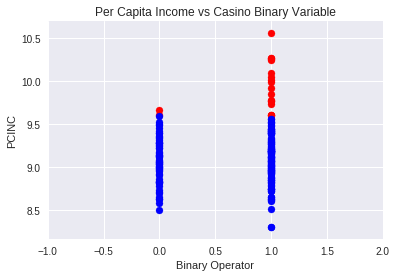

In [27]:
our_data = {'above':dat[dat['pcinc_log'] >= 9.6],
            'below':dat[dat['pcinc_log'] < 9.6],
           }

plt.title('Per Capita Income vs Casino Binary Variable')
plt.scatter(our_data['above']['casino'],our_data['above']['pcinc_log'], color='red')
plt.scatter(our_data['below']['casino'],our_data['below']['pcinc_log'], color='blue')
plt.xlabel('Binary Operator')
plt.ylabel('PCINC')
plt.xlim((-1,2))

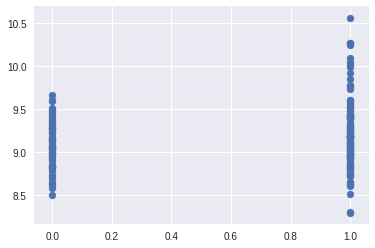

Average Per-Capita Income for Non-Casino Tribes: geo_id2
165     9.394078
250     9.359880
360     9.661989
440     9.033181
450     8.651549
510     9.130214
525     9.261509
680     9.176887
720     8.717191
940     9.015784
965     9.222467
1005    9.344434
1070    9.278386
1170    8.995413
1210    8.741136
1395    8.586346
1440    8.859079
1475    9.452266
1505    8.962264
1545    8.960981
1575    9.277064
1685    8.979417
1700    9.081484
1735    8.827908
1750    8.504716
1770    9.039908
1840    9.061260
1850    9.484633
2040    8.997395
2100    8.779250
2175    8.999125
2190    9.248984
2400    9.137232
2430    8.825707
2570    9.610793
2625    8.629450
2635    9.391912
2760    9.498147
2785    8.911934
2850    9.059401
3010    9.294498
3030    9.116469
3130    9.347054
3415    9.147401
3460    8.922258
3495    9.163668
3550    9.595875
3585    8.634087
3825    9.047821
3930    9.311271
3980    9.420196
4225    9.276970
4255    9.519148
4330    9.129022
4390    8.844192
4515    

AttributeError: 'NoneType' object has no attribute 'mean'

In [7]:
plt.scatter(dat['casino'],dat['pcinc_log'])
plt.show()

nct = (dat.loc[dat['casino'] == 0])
print('Average Per-Capita Income for Non-Casino Tribes: {0}'.format(nct.pcinc_log)).mean()


ct = (dat.loc[dat['casino'] == 1])
print('Average Per-Capita Income for Casino Tribes: {0}'.format(ct.pcinc_log)).mean()